In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [59]:
train = pd.read_csv('train.csv')

In [60]:
test = pd.read_csv('test.csv')

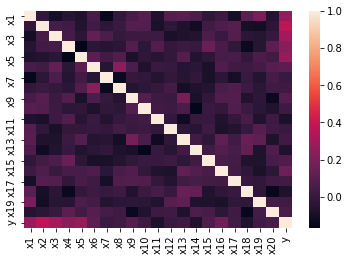

In [61]:
sns.heatmap(train.corr())

In [62]:
Y = train['y']
Y_test = test['y']

In [63]:
X = train.drop(['y'], axis=1)
X_test = test.drop('y', axis=1)

In [64]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [65]:
for models in [LogisticRegression, DecisionTreeClassifier, SVC, KNeighborsClassifier]:
    model = models()
    model.fit(X,Y)
    predicitons = model.predict(X_test)
    error = 1 - accuracy_score(Y_test, predicitons)
    print(str(models))
    print('Error on test set: ', error)
    print('==============================================================')

<class 'sklearn.linear_model._logistic.LogisticRegression'>
Error on test set:  0.16800000000000004
<class 'sklearn.tree._classes.DecisionTreeClassifier'>
Error on test set:  0.31499999999999995
<class 'sklearn.svm._classes.SVC'>
Error on test set:  0.18300000000000005
<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
Error on test set:  0.33599999999999997


In [66]:
abs(train.corr()['y'].sort_values()) > 0.03

x11     True
x18     True
x14     True
x7     False
x12    False
x10    False
x8     False
x13    False
x17     True
x19     True
x20     True
x15     True
x9      True
x6      True
x16     True
x4      True
x5      True
x1      True
x3      True
x2      True
y       True
Name: y, dtype: bool

Hence we can drop x7, x12,x10,x8,x13 as it have very low coorelation with y -> They just adding noise!

In [67]:
features = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x9', 'x11', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20']

In [68]:
X = train[features]
Y = train['y']
X_test = test[features]
Y_test = test['y']


for models in [LogisticRegression, DecisionTreeClassifier, SVC, KNeighborsClassifier]:
    model = models()
    model.fit(X,Y)
    predicitons = model.predict(X_test)
    error = 1 - accuracy_score(Y_test, predicitons)
    print(str(models))
    print('Error on test set: ', error)
    print('==============================================================')

<class 'sklearn.linear_model._logistic.LogisticRegression'>
Error on test set:  0.16100000000000003
<class 'sklearn.tree._classes.DecisionTreeClassifier'>
Error on test set:  0.32799999999999996
<class 'sklearn.svm._classes.SVC'>
Error on test set:  0.17600000000000005
<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
Error on test set:  0.30200000000000005


In [69]:
from sklearn.metrics import RocCurveDisplay, roc_curve, auc

In [70]:
best_model = LogisticRegression()
best_model.fit(X,Y)
pred_best = best_model.predict(X_test)

In [71]:
fpr, tpr, thresholds = roc_curve(Y_test, pred_best)
roc_auc = auc(fpr, tpr)

In [72]:
display = RocCurveDisplay(fpr, tpr, roc_auc,estimator_name='example estimator')

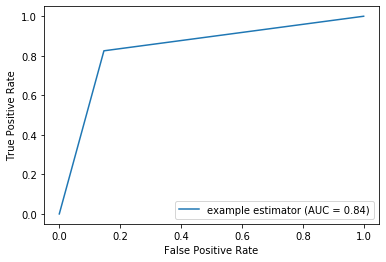

In [73]:
display.plot()

# Linear Regression

In [74]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [75]:
from sklearn.linear_model import LinearRegression 

In [76]:
model = LinearRegression()
model.fit(X,Y)
predicitons = model.predict(X)

In [77]:
value = {}
for thrs in range(30,70):
    thrs = thrs/100
    pred_bool = (sigmoid(predicitons)>thrs)
    pred = np.multiply(pred_bool, 1)
    value[thrs] = 1 - accuracy_score(Y, pred)

In [78]:
value

{0.3: 0.515,
 0.31: 0.515,
 0.32: 0.515,
 0.33: 0.515,
 0.34: 0.515,
 0.35: 0.515,
 0.36: 0.515,
 0.37: 0.515,
 0.38: 0.515,
 0.39: 0.515,
 0.4: 0.51,
 0.41: 0.51,
 0.42: 0.51,
 0.43: 0.505,
 0.44: 0.5,
 0.45: 0.485,
 0.46: 0.47,
 0.47: 0.45499999999999996,
 0.48: 0.44999999999999996,
 0.49: 0.45499999999999996,
 0.5: 0.43999999999999995,
 0.51: 0.41000000000000003,
 0.52: 0.39,
 0.53: 0.37,
 0.54: 0.33999999999999997,
 0.55: 0.32499999999999996,
 0.56: 0.30500000000000005,
 0.57: 0.27,
 0.58: 0.21499999999999997,
 0.59: 0.19999999999999996,
 0.6: 0.16000000000000003,
 0.61: 0.13,
 0.62: 0.11499999999999999,
 0.63: 0.09999999999999998,
 0.64: 0.12,
 0.65: 0.135,
 0.66: 0.17000000000000004,
 0.67: 0.20999999999999996,
 0.68: 0.235,
 0.69: 0.30000000000000004}

In [34]:
predicitons = model.predict(X_test)

pred_bool = sigmoid(predicitons)>0.62

pred = np.multiply(pred_bool, 1)
accuracy_score(Y_test, pred)

In [40]:
accuracy_score(Y,np.multiply(sigmoid(model.predict(X)) > 0.62,1))

0.885

In [254]:
X_ = X[features]
X_test_ = X_test[features]
model = LinearRegression()
model.fit(X_,Y)
predicitons = model.predict(X_test_)

value = {}
for thrs in range(30,70):
    thrs = thrs/100
    pred_bool = (sigmoid(predicitons)>thrs)
    pred = np.multiply(pred_bool, 1)
    value[thrs] = 1 - accuracy_score(Y_test, pred)

value

{0.3: 0.491,
 0.31: 0.491,
 0.32: 0.491,
 0.33: 0.492,
 0.34: 0.491,
 0.35: 0.491,
 0.36: 0.489,
 0.37: 0.489,
 0.38: 0.486,
 0.39: 0.485,
 0.4: 0.482,
 0.41: 0.479,
 0.42: 0.478,
 0.43: 0.478,
 0.44: 0.472,
 0.45: 0.47,
 0.46: 0.46199999999999997,
 0.47: 0.45099999999999996,
 0.48: 0.43600000000000005,
 0.49: 0.43200000000000005,
 0.5: 0.41600000000000004,
 0.51: 0.405,
 0.52: 0.392,
 0.53: 0.371,
 0.54: 0.35,
 0.55: 0.32299999999999995,
 0.56: 0.29900000000000004,
 0.57: 0.269,
 0.58: 0.241,
 0.59: 0.21599999999999997,
 0.6: 0.18300000000000005,
 0.61: 0.15500000000000003,
 0.62: 0.15100000000000002,
 0.63: 0.15200000000000002,
 0.64: 0.17100000000000004,
 0.65: 0.20899999999999996,
 0.66: 0.242,
 0.67: 0.28200000000000003,
 0.68: 0.31399999999999995,
 0.69: 0.349}

In [255]:
1- accuracy_score(Y,np.multiply(sigmoid(model.predict(X_)) > 0.62,1))

0.11499999999999999

In [51]:
x = {k: v for k, v in sorted(value.items(), key=lambda item: item[1])}

In [57]:
list(x.keys())[0]

0.62